In [2]:
from PIL import Image
import pytesseract
import cv2
import matplotlib.pyplot as plt
import requests
import os

In [3]:
r=requests.get('http://113.108.219.40/Dop/CheckCode.aspx?codemark=38.63767845258748')

with open('code.gif','wb') as f:
    f.write(r.content)

In [37]:
im = Image.open('Check.gif')
im=im.convert('RGB')
r,g,b,=im.split()

In [39]:
print(r.mode)
print(g.mode)
print(b.mode)



# b.mode

L
L
L


In [40]:
r.save('r.jpg')
b.save('b.jpg')
g.save('g.jpg')

In [43]:
# b=b.convert('1')
pytesseract.image_to_string(g)

u'DZT41'

In [53]:
# im=Image.open('code.png')
img = cv2.imread('g.jpg')
print(img.shape)
# print(type(img))
print(img.size)
# converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img[:,0])

(22, 73, 3)
4818
[[ 0  0  0]
 [ 0  0  0]
 [11 11 11]
 [ 0  0  0]
 [ 3  3  3]
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]
 [ 3  3  3]
 [ 0  0  0]
 [ 0  0  0]
 [ 8  8  8]
 [ 0  0  0]
 [10 10 10]
 [ 0  0  0]
 [ 6  6  6]
 [ 0  0  0]
 [ 0  0  0]
 [10 10 10]
 [ 0  0  0]
 [ 6  6  6]
 [ 3  3  3]]


In [63]:
dst = cv2.fastNlMeansDenoisingColored(img,None,49,49,15,21)

In [21]:
print cv2.getBuildInformation()


General configuration for OpenCV 2.4.13.6 =====================================
  Version control:               2.4.13.6

  Platform:
    Timestamp:                   2018-02-22T00:42:24Z
    Host:                        Windows 10.0.16299 AMD64
    CMake:                       3.9.3
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            C:/Program Files (x86)/MSBuild/14.0/bin/MSBuild.exe
    MSVC:                        1900

  C/C++:
    Built as dynamic libs?:      NO
    C++ Compiler:                C:/Program Files (x86)/Microsoft Visual Studio 14.0/VC/bin/cl.exe  (ver 19.0.24215.1)
    C++ flags (Release):         /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRECATE /D _SCL_SECURE_NO_WARNINGS /Gy /bigobj /arch:SSE2 /Oi /fp:fast  /wd4251 /wd4275 /wd4589 /wd4359 /MP8  /MT /O2 /Ob2 /DNDEBUG  /Zi
    C++ flags (Debug):           /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRE

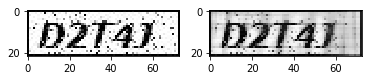

In [64]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

In [ ]:
img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)
im_pil.show()
img_l = im_pil.convert('1')
pytesseract.image_to_string(img_l)

In [22]:
import sys

def processImage(infile):
    try:
        im = Image.open(infile)
    except IOError:
        print "Cant load", infile
        sys.exit(1)
    i = 0
    mypalette = im.getpalette()

    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            new_im.save('foo'+str(i)+'.png')

            i += 1
            im.seek(im.tell() + 1)

    except EOFError:
        pass # end of sequence

processImage('code.gif')